Plotting Review
===

This notebook will briefly review the most basic plotting tools in [matplotlib](https://matplotlib.org/stable/) and [ROOT](https://root.cern/manual/basics/)


**Important reminder: you can always ask in the dicsussion group if you need help or examples for using any of the tools in this class.**

Matplotlib quick review
---

Matplotlib contains a large array of plotting tools.  Therefore, you can expect to be browsing documentation frequently as you work with this module.  The home page has generally useful examples you can follow for using each tool.

We will review there following types of plots:

* Basic Graphs
* 1D and 2D Histograms

**Graphs**

The basic graph is made as follows:

https://matplotlib.org/stable/plot_types/basic/plot.html#sphx-glr-plot-types-basic-plot-py

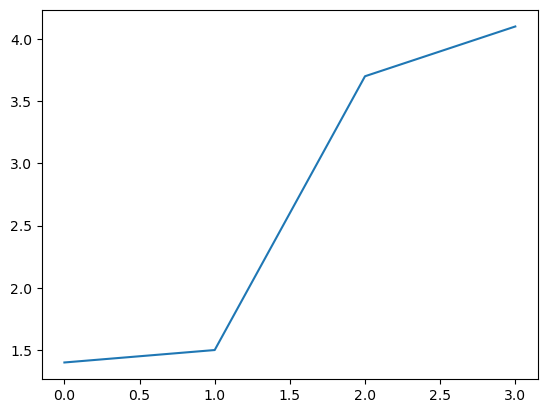

In [12]:
import numpy as np
from matplotlib import pyplot as plt 

x = np.array([0.0,1.0,2.0,3.0], dtype='d')  # x_1
y = np.array([1.4,1.5,3.7,4.1], dtype='d')  # y_i
e = np.array([0.5,0.2,1.0,0.5], dtype='d')  # sigma_i

plt.plot(x, y)
#plt.show()  # needed if we are NOT running in a notebook  

**A graph with errorbars and better labeling**

https://matplotlib.org/stable/plot_types/stats/errorbar_plot.html

[Text(0.5, 0, 'x-label'), Text(0, 0.5, 'y-label')]

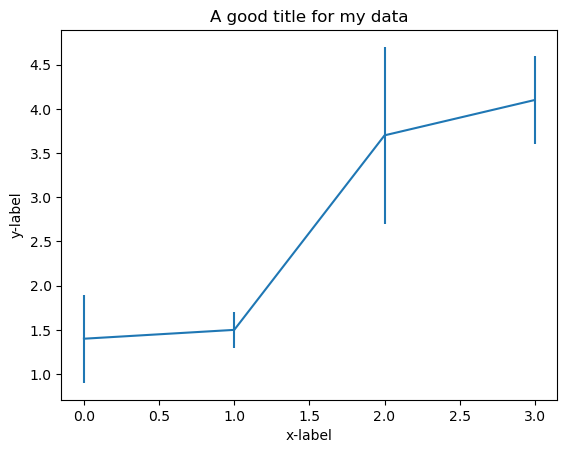

In [13]:
fig,ax=plt.subplots()
ax.errorbar(x, y, yerr=e)
ax.set_title("A good title for my data")
ax.set(xlabel='x-label', ylabel='y-label')
#fig.show()

Graphs of functions are just performed using arrays

[Text(0.5, 0, 'x'), Text(0, 0.5, 'sin(x)')]

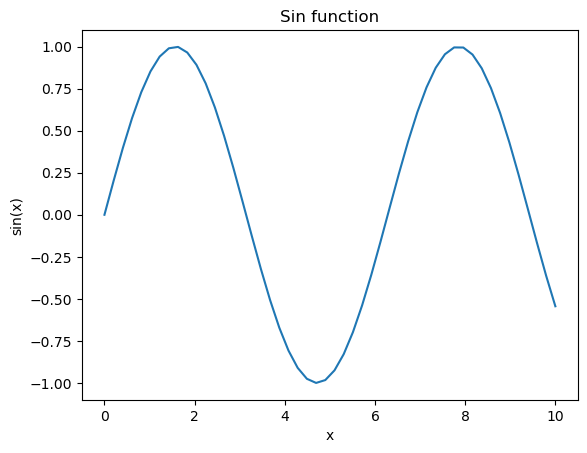

In [14]:
x=np.linspace(0,10)
y=np.sin(x)
fig,ax=plt.subplots()
ax.errorbar(x, y)
ax.set_title("Sin function")
ax.set(xlabel='x', ylabel='sin(x)')
#fig.show()

**Histograms**

See documentation: https://matplotlib.org/stable/gallery/statistics/hist.html#histograms

Below we specify the binning, but let matplotlib determine the range.  Gor range setting and other option see here: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

[Text(0.5, 0, 'x'), Text(0, 0.5, 'frequency')]

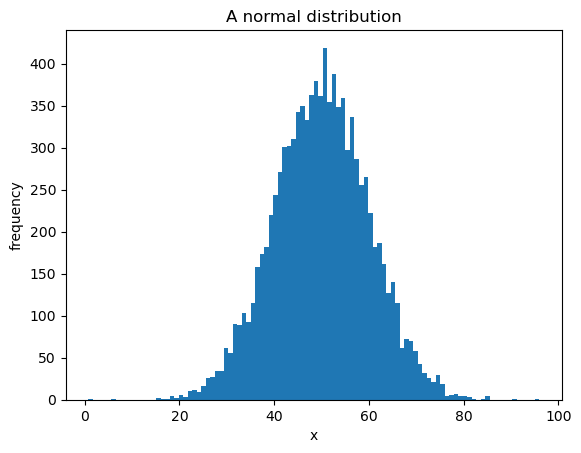

In [15]:
mu=50
sigma=10
nsamples=10000
samples = np.random.normal(mu,sigma,nsamples)
nbins=100
fig,ax=plt.subplots()
ax.hist(samples,bins=nbins)
ax.set_title("A normal distribution")
ax.set(xlabel='x', ylabel='frequency')
#fig.show()

Try to make a version of thsis plot with 50 bins and the range set to the interval [0,100]

In [16]:
# practice here

**2D histogram example**

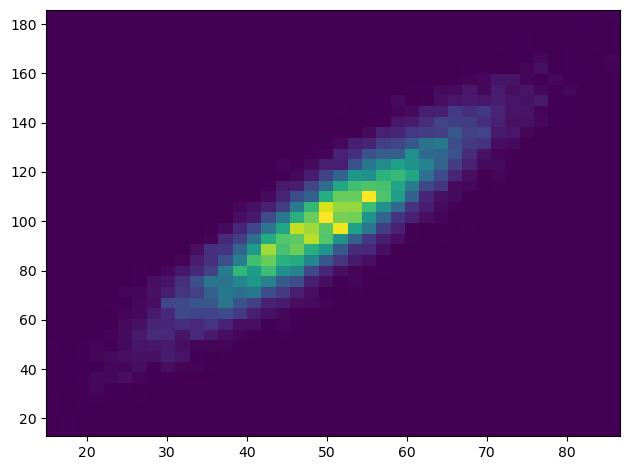

In [17]:
x = np.random.normal(mu,sigma,nsamples)
y = x+np.random.normal(x,sigma)

fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(x, y,bins=(40,40))
#fig.show()

Matplotlib practice
-----

* make a plot with two panels showing the 1d and 2d histograms together
* make an overlay of a "function" and a histogram
* plot the 2D histogram as a 2D bar (lego) plot

Root plots quick review
----

The [ROOT manual basics webpage](https://root.cern/manual/basics/) is an excellent source to start browsing the documentation.

Objects in ROOT have many features, too many to memorize. You will need to frequently refer to the ROOT documentation as you prepare your code. This is generally true for any complex package you will be using in your work. In this tutorial, we will mostly use the following classes:

* (TGraph)[https://root.cern.ch/doc/master/classTGraph.html]: Graph of x-y data points
* (TH1)[https://root.cern.ch/doc/master/classTH1.html]: 1D Histogram (base class)
  * (TH1F)[https://root.cern.ch/root/html/TH1F.html]: 1D Histogram (of floats)
  * (TH2F)[https://root.cern.ch/root/html/TH2F.html]: 2D Histogram (of floats)
* (TF1)[https://root.cern.ch/root/html/TF1.html]: a class to model 1D functions

The examples below are given in PyROOT.  The interfaces are the same in Python and C++, with substitution of pointer notation as necessary.  You can find additional C++ examples of using ROOT objects in programs provided throughout the semester.

**We begin with the TGraph**
The TGraph is a container of x,y vectors

In [18]:
import ROOT as r

xmin=0.0
xmax=10.0
nx=20

tg = r.TGraph()
dx=(xmax-xmin)/nx
for i in range(nx):
    x = xmin+dx*i
    tg.SetPoint(i,x,x*x)

# comment 1: here we filled the graph 1 point at a time, other methods are possible, eg using x,y arrays to fill the graph

print("Points in the graph",tg.GetN())

# add some decorations
tg.SetTitle("Mytitle;x-label;y-label")

# create a TCanvas 
tc = r.TCanvas()
# draw the graph
tg.Draw("A*c")    # A = calculate and draw axes, * = mark points with a *, c connect the points with a smooth curve
# draw the canvas
tc.Draw()

Points in the graph 20


Note that if we aren't running in a notebook, we can skip the creation of a TCanvas.  In that case ROOT will create and display a default canvas.  But it is often useful to create your own canvas explicitly, especially if you want to have multiple plot windows displayed at the same time.

Next let's generate a couple of histograms of the 1d and 2d variety

In [19]:
h1 = r.TH1F("h1","My 1d histogram;x;frequency",100,0,100)  # 100 bins in range [0,100]
rand=r.TRandom2()
for i in range(nsamples):
    h1.Fill(rand.Gaus(mu,sigma))

h2 = r.TH2F("h2","My 2d histogram;x;frequency",40,0,100,40,0,200)  # (40,40) bins in range x=[0,100], y=[0;200]
for i in range(nsamples):
    x = rand.Gaus(mu,sigma)
    y = x + rand.Gaus(x,sigma)
    h2.Fill(x,y)

Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).


In [20]:
# let's make a new canvas with two panels and draw these
tc2=r.TCanvas()
tc2.Divide(2,1)
tc2.cd(1)
h1.Draw()
tc2.cd(2)
h2.Draw()
tc2.Draw()

In [21]:
# and let's play with some drawing options
# all the drawing options can of course be found in the documentation
# for the THistPainter Class
tc2.cd(1)
h1.Draw("e")
tc2.cd(2)
h2.Draw("surf3")
tc2.Draw()

Finally a quick look at the TF1 or 1D fucntion

In [22]:
fun1 = r.TF1("fun1","3*sin(x)/(x)",0.0001,10)    # a simple function
fun2 = r.TF1("fun2","[0]+[1]*x+[2]*x*x",0,10)    # a function with adjustable parameters
fun2.SetParameters(1,3,-0.4)

# some decorations
fun2.SetLineColor(r.kBlue)
fun2.SetTitle("Mytitle;x;y")


tc.cd()  # move back to our original canvas
fun2.Draw()
fun1.Draw("same")
tc.Draw()

ROOT Practice
----

* make an overlay of a "function" and a histogram
* plot the 2D histogram as a 2D colormap